In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head(10)

--2021-02-11 07:48:49--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘insurance.csv’

insurance.csv           [ <=>                ]  49.09K  --.-KB/s    in 0.02s   

2021-02-11 07:48:50 (2.41 MB/s) - ‘insurance.csv’ saved [50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [3]:
dataset['sex'] = dataset['sex'].astype('category').cat.codes
dataset['smoker'] = dataset['smoker'].astype('category').cat.codes
dataset['region'] = dataset['region'].astype('category').cat.codes

In [5]:
dataset_copy = dataset.copy()

In [6]:
dataset_copy

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [7]:
train_dataset = dataset_copy.sample(frac=0.8, random_state=0)
train_dataset

,age,sex,bmi,children,smoker,region,expenses
578,52,1,30.2,1,0,3,9724.53
610,47,0,29.4,1,0,2,8547.69
569,48,1,40.6,2,1,1,45702.02
1034,61,1,38.4,0,0,1,12950.07
198,51,0,18.1,0,0,1,9644.25
...,...,...,...,...,...,...,...
584,19,1,20.7,0,0,3,1242.82
147,51,0,37.7,1,0,2,9877.61
160,42,0,26.6,0,1,1,21348.71
750,37,0,26.4,0,1,2,19539.24


In [8]:
test_dataset = dataset_copy.drop(train_dataset.index)
test_dataset

,age,sex,bmi,children,smoker,region,expenses
11,62,0,26.3,0,1,2,27808.73
23,34,0,31.9,1,1,0,37701.88
24,37,1,28.0,2,0,1,6203.90
25,59,0,27.7,3,0,2,14001.13
28,23,1,17.4,1,0,1,2775.19
...,...,...,...,...,...,...,...
1305,24,0,27.7,0,0,2,2464.62
1315,18,1,28.3,1,0,0,11272.33
1318,35,1,39.7,4,0,0,19496.72
1326,42,0,32.9,0,0,0,7050.02


In [9]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [103]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
]) 

In [25]:
len(train_dataset.keys())

6

In [26]:
train_dataset.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [104]:
optimizer = keras.optimizers.RMSprop()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [105]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels,
                    epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop]
)

Epoch 1/1000
27/27 [==============================] - 1s 11ms/step - loss: 326843401.1429 - mae: 13176.9708 - mse: 326843401.1429 - val_loss: 360588576.0000 - val_mae: 14337.3887 - val_mse: 360588576.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 334779078.8571 - mae: 13328.4705 - mse: 334779078.8571 - val_loss: 324891776.0000 - val_mae: 13093.5322 - val_mse: 324891776.0000
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: 240947850.2857 - mae: 10444.8350 - mse: 240947850.2857 - val_loss: 202056064.0000 - val_mae: 8510.0811 - val_mse: 202056064.0000
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 150061254.0000 - mae: 7422.9239 - mse: 150061254.0000 - val_loss: 146117280.0000 - val_mae: 9366.8799 - val_mse: 146117280.0000
Epoch 5/1000
27/27 [==============================] - 0s 3ms/step - loss: 115527473.1429 - mae: 8504.8107 - mse: 115527473.1429 - val_loss: 145697104.0000 - val_mae: 9876.6807 - val_mse:

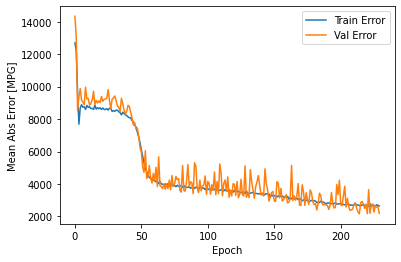

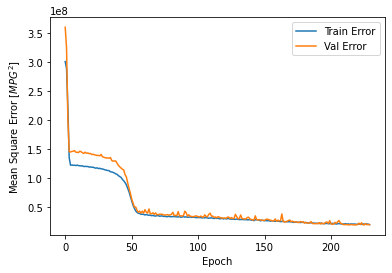

In [106]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

9/9 - 0s - loss: 34445516.0000 - mae: 2917.9080 - mse: 34445516.0000
Testing set Mean Abs Error: 2917.91 expenses
You passed the challenge. Great job!


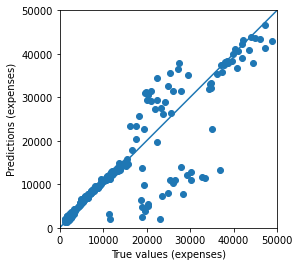

In [107]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [47]:
test_predictions

array([31284.416 , 34351.07  ,  7741.748 , 16030.652 ,  3531.8074,
        6704.406 , 15424.502 , 17243.205 ,  6782.803 ,  7945.532 ,
       29412.266 ,  7916.44  , 19628.254 , 13869.713 , 13926.923 ,
       39513.3   , 38295.91  , 13342.104 , 13244.258 ,  7695.2163,
       40314.254 , 19590.2   , 13367.125 ,  2814.7964, 13975.047 ,
       14652.448 ,  2393.9407, 35457.55  , 10951.424 ,  7757.291 ,
       14986.196 ,  1905.6505,  2924.3403, 34921.41  ,  2466.1238,
        9904.437 ,  6275.4067,  7844.8003,  4348.502 ,  6513.7725,
        4038.7742,  7982.0264, 13744.869 ,  6852.898 , 10612.799 ,
       16360.186 , 10990.254 , 38711.582 , 27505.846 ,  8883.404 ,
        5142.5977, 12713.226 , 12648.174 ,  2153.0647,  8245.296 ,
       34194.723 , 41472.637 ,  6840.2866, 11635.566 ,  3437.9768,
       11806.324 ,  2829.6145, 12792.258 , 16006.354 ,  4230.1763,
        5826.0967, 22217.826 , 25891.344 ,  5588.3125, 30803.342 ,
       13645.557 ,  4168.545 , 10824.201 , 15249.461 ,  3294.1